# Flower data, basic ML model

In this notebook we will train our first machine learning model. The goal is to predict the labels of unknown flowers. 

### loading libraries

In [1]:
import matplotlib.image as img # To load the images
import matplotlib.pyplot as plt # To plot the images

import copy  # to copy variables
import numpy as np # To do some calculations
import pandas as pd # To work with dataframes (easier matrices)
from sklearn.ensemble import RandomForestClassifier # The machine learning model 
from os import listdir # To get a list of files in a folder
from sklearn.metrics import accuracy_score

In [2]:
# provide the location of image for reading
bloem1 = img.imread("01 Flower Training/0003.png");

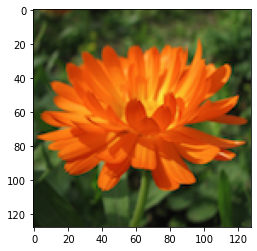

In [3]:
plt.imshow(bloem1)

Ok, it's clear we loaded the image correctly. It is now stored in the 'bloem1' object. Let's look at the shape of the image we just read.

In [4]:
bloem1.shape

(128, 128, 4)

This is interesting. The shape of the data object is 128x128x4. It seems that the size of the image is 128 by 128 pixels. The 4 indicates there are 4 layers in the data. Most likely that is 3 for color and 1 for something else. Let's plot each layer individually and see what we have.

Note that python indexes start at 0. So the first layer has index 0, the second layer index 1, etc.

In [5]:
layer1 = bloem1[:,:,0]
layer2 = bloem1[:,:,1]
layer3 = bloem1[:,:,2]
layer4 = bloem1[:,:,3]

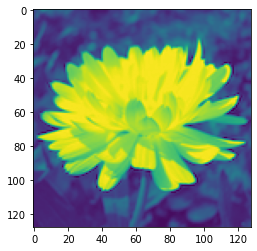

In [6]:
plt.imshow(layer1)

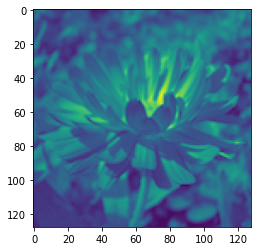

In [7]:
plt.imshow(layer2)

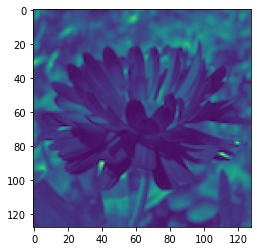

In [8]:
plt.imshow(layer3)

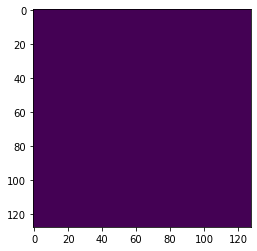

In [9]:
plt.imshow(layer4) #has no variation 

Ok, there a number of things we can see. 
- Firstly, layer4 has the same value for everything. Most likely the 4 layer has something to do with the brigtness of the image or something. Whatever is is, we clearly do not need it. 
- secondly, all layers seem to be composed of blue green and yellow. What's that all about? Most likely it is to do with the default of imshow, where it will show large values with a bright yellow color, and smaller values with a darker green/blue color. How to test this? Maybe we can take the original image and put some layers to zero to see what happens.

In [10]:
bloem1_copy = copy.deepcopy(bloem1)

In [11]:
bloem1_copy[:,:,1] = np.zeros((128, 128)) # set layer 2 to be all zeros
bloem1_copy[:,:,2] = np.zeros((128, 128)) # set layer 3 to be all zeros

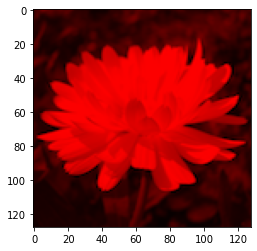

In [12]:
plt.imshow(bloem1_copy)

Ok, now we are getting somewhere. We put layer 2 and 3 (index 1 and 2 remember) to zero and the final image is all red. We can conclude that layer 1 contains the red. So let's for now assume that the first layer is indeed red and the following layers are green and blue (RGB). Can you do the other layers yourself?

## Calculating features

We want to quantify our image in  few variables which we have to calculate. In class we saw the sum example. So let's calculate the sum for each color, and let's see how we would be able to gather that data up in a matrix like structure (ndarray in python).

In [13]:
RedSum = layer1.sum()
GreenSum = layer2.sum()
BlueSum = layer3.sum()

RGB_sums = [[RedSum, GreenSum, BlueSum]]

In [14]:
RGB_sums

[[8152.263, 5193.024, 1677.9609]]

In [15]:
test = np.append(RGB_sums, RGB_sums, axis = 0)

In [16]:
test

array([[8152.263 , 5193.024 , 1677.9609],
       [8152.263 , 5193.024 , 1677.9609]], dtype=float32)

In [17]:
test = np.append(test, RGB_sums, axis = 0) #classnotes
test

array([[8152.263 , 5193.024 , 1677.9609],
       [8152.263 , 5193.024 , 1677.9609],
       [8152.263 , 5193.024 , 1677.9609]], dtype=float32)

## Training Data

## Making the data matrix

The ML model we want to train expects

In [18]:
training_files = listdir("01 Flower Training")
training_files

['0003.png',
 '0039.png',
 '0045.png',
 '0050.png',
 '0074.png',
 '0081.png',
 '0087.png',
 '0092.png',
 '0094.png',
 '0101.png',
 '0102.png',
 '0113.png',
 '0132.png',
 '0139.png',
 '0145.png',
 '0157.png',
 '0166.png',
 '0177.png',
 '0193.png',
 '0210.png']

In [19]:
RGB_Sum_results = np.empty((0, 3), float) # initialization of empty ndarray
for file in training_files:
    flower_filepath = "01 Flower Training/" + file
    print("processing " + flower_filepath)
    
    bloem = img.imread(flower_filepath)
    
    RED_layer = bloem[:,:,0]
    GREEN_layer = bloem[:,:,1]
    BLUE_layer = bloem[:,:,2]
    
    RedSum = RED_layer.sum()
    GreenSum = GREEN_layer.sum()
    BlueSum = BLUE_layer.sum()
    
    RGB_sum = [[RedSum, GreenSum, BlueSum]]
    print(RGB_sum, end = "\n \n") # the two times '\n' is to leave space between each print output. It is just to get a nice looking output
          
    RGB_Sum_results = np.append(RGB_Sum_results, RGB_sum, axis = 0) 

RGB_Sum_results    

processing 01 Flower Training/0003.png
[[8152.263, 5193.024, 1677.9609]]
 
processing 01 Flower Training/0039.png
[[8790.212, 6647.957, 2448.0159]]
 
processing 01 Flower Training/0045.png
[[9239.98, 2846.6316, 3180.9258]]
 
processing 01 Flower Training/0050.png
[[7923.353, 4252.7925, 3566.3257]]
 
processing 01 Flower Training/0074.png
[[8076.663, 7806.7764, 6063.553]]
 
processing 01 Flower Training/0081.png
[[10759.781, 6068.6396, 5549.6553]]
 
processing 01 Flower Training/0087.png
[[7562.51, 5420.949, 1850.612]]
 
processing 01 Flower Training/0092.png
[[9131.231, 9299.07, 6491.373]]
 
processing 01 Flower Training/0094.png
[[8442.486, 4852.8984, 1348.8745]]
 
processing 01 Flower Training/0101.png
[[8451.287, 5859.71, 4424.5884]]
 
processing 01 Flower Training/0102.png
[[6278.5215, 4640.9805, 1512.2512]]
 
processing 01 Flower Training/0113.png
[[8359.773, 5775.871, 1920.3845]]
 
processing 01 Flower Training/0132.png
[[7193.459, 5351.5923, 2069.31]]
 
processing 01 Flower Trai

array([[ 8152.26318359,  5193.02392578,  1677.9609375 ],
       [ 8790.21191406,  6647.95703125,  2448.01586914],
       [ 9239.98046875,  2846.6315918 ,  3180.92578125],
       [ 7923.35302734,  4252.79248047,  3566.32568359],
       [ 8076.66308594,  7806.77636719,  6063.55322266],
       [10759.78125   ,  6068.63964844,  5549.65527344],
       [ 7562.50976562,  5420.94921875,  1850.61206055],
       [ 9131.23144531,  9299.0703125 ,  6491.37304688],
       [ 8442.48632812,  4852.8984375 ,  1348.87451172],
       [ 8451.28710938,  5859.70996094,  4424.58837891],
       [ 6278.52148438,  4640.98046875,  1512.2512207 ],
       [ 8359.7734375 ,  5775.87109375,  1920.38452148],
       [ 7193.45898438,  5351.59228516,  2069.31005859],
       [ 7557.49902344,  5959.45507812,  1874.99633789],
       [ 8068.09863281,  6100.84716797,  2251.72949219],
       [ 6708.38427734,  6627.96875   ,  2153.18847656],
       [ 9487.12109375,  8097.04345703,  3403.50219727],
       [ 8599.38476562,  6738.2

## Building the outcome vector (flower type for each file)


In [20]:
flower_metadata = pd.read_csv("01 all_flower_labels.csv", header = 0, sep = ";")
flower_metadata.head()

,Unnamed: 0,file,label,name
0,3,0003.png,2,calendula
1,6,0006.png,1,rose
2,16,0016.png,1,rose
3,21,0021.png,2,calendula
4,27,0027.png,2,calendula


In [21]:
outcome_vector = pd.DataFrame({"training_file" : training_files})
outcome_vector.head()

,training_file
0,0003.png
1,0039.png
2,0045.png
3,0050.png
4,0074.png


In [22]:
outcome_data = pd.merge(outcome_vector, flower_metadata, left_on = 'training_file', right_on = 'file')
outcome_data.head()

,training_file,Unnamed: 0,file,label,name
0,0003.png,3,0003.png,2,calendula
1,0039.png,39,0039.png,2,calendula
2,0045.png,45,0045.png,1,rose
3,0050.png,50,0050.png,1,rose
4,0074.png,74,0074.png,1,rose


## Building the model

Now that we have our data matrix, we are going to build a model. In python this is done by first defining a model and storing this in an object. Afterwards we add data to this model and train it.

In [25]:
## Step 1: defining the model
ML_model = RandomForestClassifier(n_estimators=100)

In [26]:
## Step 2: training the model with the data we prepared

ML_model.fit(RGB_Sum_results, outcome_data['name'])


RandomForestClassifier()

## Evaluating the model on the training data

A first step we can do to see if our model has at least trained itself, is to give it the training data to predict. If it has learned something we expect it to predict these labels quite ok.

In [54]:
y_pred = ML_model.predict(RGB_Sum_results)

prediction_check = pd.DataFrame({'True label':outcome_data['name'],
                                'Predicted label': y_pred})
prediction_check

ValueError: array length 20 does not match index length 19

## Test Data
This one you should be able to tackle on your own. It's the same as making the training data but now with the test set images. When that is done, you evaluate the model on this data and compare to the true outcome. This will tell you whether it has actually learned the difference or not.

In [28]:
#1) Read in the filles 
#2) Loop over files 
#3) Predict data

### Making the data matrix

In [29]:
testing_files = listdir("01 Flower Test Set")
testing_files

['0006.png',
 '0016.png',
 '0021.png',
 '0027.png',
 '0042.png',
 '0061.png',
 '0062.png',
 '0095.png',
 '0105.png',
 '0106.png',
 '0122.png',
 '0127.png',
 '0151.png',
 '0159.png',
 '0163.png',
 '0164.png',
 '0179.png',
 '0188.png',
 '0201.png']

In [30]:
RGB_Sum_test = np.empty((0, 3), float) # initialization of empty ndarray
for file in testing_files:
    flower_filepath = "01 Flower Test Set/" + file
    print("processing " + flower_filepath)
    
    bloem = img.imread(flower_filepath)
    
    RED_layer = bloem[:,:,0]
    GREEN_layer = bloem[:,:,1]
    BLUE_layer = bloem[:,:,2]
    
    RedSum = RED_layer.sum()
    GreenSum = GREEN_layer.sum()
    BlueSum = BLUE_layer.sum()
    
    RGB_sum = [[RedSum, GreenSum, BlueSum]]
    print(RGB_sum, end = "\n \n") # the two times '\n' is to leave space between each print output. It is just to get a nice looking output
          
    RGB_Sum_test = np.append(RGB_Sum_test, RGB_sum, axis = 0) 

RGB_Sum_test 

processing 01 Flower Test Set/0006.png
[[7731.9453, 6704.7886, 5322.922]]
 
processing 01 Flower Test Set/0016.png
[[11879.863, 6369.718, 6365.169]]
 
processing 01 Flower Test Set/0021.png
[[8142.6943, 5617.3022, 2015.3923]]
 
processing 01 Flower Test Set/0027.png
[[8487.776, 4844.777, 1975.859]]
 
processing 01 Flower Test Set/0042.png
[[5232.663, 5255.4434, 3731.5728]]
 
processing 01 Flower Test Set/0061.png
[[9384.533, 6549.616, 2677.3647]]
 
processing 01 Flower Test Set/0062.png
[[10238.11, 3963.5962, 4254.6475]]
 
processing 01 Flower Test Set/0095.png
[[8263.808, 4711.8906, 3554.6943]]
 
processing 01 Flower Test Set/0105.png
[[9621.311, 10350.777, 6723.5454]]
 
processing 01 Flower Test Set/0106.png
[[7250.298, 4769.9727, 2068.3845]]
 
processing 01 Flower Test Set/0122.png
[[8250.389, 5569.2, 1732.5295]]
 
processing 01 Flower Test Set/0127.png
[[8312.784, 6680.8164, 2771.3062]]
 
processing 01 Flower Test Set/0151.png
[[7245.5215, 5844.2236, 1996.157]]
 
processing 01 Flow

array([[ 7731.9453125 ,  6704.78857422,  5322.921875  ],
       [11879.86328125,  6369.71777344,  6365.16894531],
       [ 8142.69433594,  5617.30224609,  2015.39233398],
       [ 8487.77636719,  4844.77685547,  1975.85900879],
       [ 5232.66308594,  5255.44335938,  3731.57275391],
       [ 9384.53320312,  6549.61621094,  2677.36474609],
       [10238.11035156,  3963.59619141,  4254.64746094],
       [ 8263.80761719,  4711.890625  ,  3554.69433594],
       [ 9621.31054688, 10350.77734375,  6723.54541016],
       [ 7250.29785156,  4769.97265625,  2068.38452148],
       [ 8250.38867188,  5569.20019531,  1732.52954102],
       [ 8312.78417969,  6680.81640625,  2771.30615234],
       [ 7245.52148438,  5844.22363281,  1996.15698242],
       [ 5375.45507812,  7575.02734375,  2753.56103516],
       [ 5822.90234375,  8634.64746094,  2456.07080078],
       [ 6155.57617188,  5136.74121094,  1777.22363281],
       [ 6377.36132812,  5807.40820312,  3199.67480469],
       [10324.63964844,  5980.5

### Building the outcome vector (flower type for each file)

In [31]:
flower_metadata = pd.read_csv("01 all_flower_labels.csv", header = 0, sep = ";")
flower_metadata.head()

,Unnamed: 0,file,label,name
0,3,0003.png,2,calendula
1,6,0006.png,1,rose
2,16,0016.png,1,rose
3,21,0021.png,2,calendula
4,27,0027.png,2,calendula


In [32]:
outcome_vector = pd.DataFrame({"test_file" : testing_files})
outcome_vector.head()

,test_file
0,0006.png
1,0016.png
2,0021.png
3,0027.png
4,0042.png


In [33]:
outcome_data = pd.merge(outcome_vector, flower_metadata, left_on = 'test_file', right_on = 'file')
outcome_data.head()

,test_file,Unnamed: 0,file,label,name
0,0006.png,6,0006.png,1,rose
1,0016.png,16,0016.png,1,rose
2,0021.png,21,0021.png,2,calendula
3,0027.png,27,0027.png,2,calendula
4,0042.png,42,0042.png,1,rose


### Evaluating the model on the test data 

In [34]:
y_pred = ML_model.predict(RGB_Sum_test)

prediction_check = pd.DataFrame({'True label':outcome_data['name'],
                                'Predicted label': y_pred})
prediction_check

,True label,Predicted label
0,rose,rose
1,rose,rose
2,calendula,calendula
3,calendula,calendula
4,rose,rose
5,calendula,calendula
6,rose,rose
7,rose,rose
8,rose,rose
9,calendula,calendula


In [35]:
print("The accuracy score of this test is", accuracy_score(outcome_data['name'],y_pred))

The accuracy score of this test is 0.9473684210526315


### Build + plot PR & ROC for test data

### Train Data

In [ ]:
y_prob = ML_model.predict_proba(RGB_Sum_results)
y_prob

In [52]:
terms = pd.DataFrame(columns = ["True label", "Predicted probability"],)

In [ ]:
for x in range(len(y_prob)): 
    if (y_prob[x][1]  <= 0.0):
         y_prob[x][1] == "calendula"
    else:
        y_prob[x][1] == "calendula"    
        
y_prob

### Test Data

In [39]:
y_pred = ML_model.predict(RGB_Sum_test)
y_prob = ML_model.predict_proba(RGB_Sum_test)
y_prob

array([[0.18, 0.82],
       [0.13, 0.87],
       [0.97, 0.03],
       [0.9 , 0.1 ],
       [0.3 , 0.7 ],
       [0.63, 0.37],
       [0.1 , 0.9 ],
       [0.36, 0.64],
       [0.2 , 0.8 ],
       [0.89, 0.11],
       [1.  , 0.  ],
       [0.74, 0.26],
       [0.92, 0.08],
       [0.41, 0.59],
       [0.4 , 0.6 ],
       [0.93, 0.07],
       [0.46, 0.54],
       [0.1 , 0.9 ],
       [0.44, 0.56]])

In [ ]:
## train test split 

In [ ]:
x_train, x_test, y_traint, y_test = traint_test_split(data, label, test_size=0.33, random_state=4)
x_train 